# Initial Exploratory Data Analysis (EDA)

In [1]:
# Libraries import 
import sys, os
from pathlib import Path

sys.path.append(os.path.abspath(os.path.join('..')))
from watermark.dataset import DataHandler
from watermark.dataset import MissingValueAnalyzer
from watermark.features import DataFrameAnalyzer
from watermark.features import DataStatistics
from watermark.plots import PlotHandler


2025-01-22 12:21:56.370 | INFO     | watermark.config:<module>:11 - PROJ_ROOT path is: C:\Users\55144\OneDrive - ArcelorMittal\Desktop\Trabajos MNA\TrimEne-Arp25\Proyecto integrador\watermarking


In [2]:
dh = DataHandler()

In [3]:
print("Directorio de trabajo actual:", os.getcwd())


Directorio de trabajo actual: c:\Users\55144\OneDrive - ArcelorMittal\Desktop\Trabajos MNA\TrimEne-Arp25\Proyecto integrador\watermarking\notebooks


In [4]:
data_dict = dh.load_data(Path("../data/raw"), "emothaw_data.pkl")

2025-01-22 12:21:57.673 | INFO     | watermark.dataset:load_data:50 - Loading data from ..\data\raw\emothaw_data.pkl
2025-01-22 12:21:57.843 | SUCCESS  | watermark.dataset:load_data:55 - Data loaded successfully from ..\data\raw\emothaw_data.pkl


In [5]:
# Recorrer las claves
for clave in data_dict:
    print(clave)



t1_data
t2_data
t3_data
t4_data
t5_data
t6_data
t7_data


In [6]:
# Recorrer los valores
for valor in data_dict.values():
    print(valor)



[           Y       X     Azimuth    Altitude  Pressure
0     4730.0  6786.0  158.241758  172.434018      67.0
1     4735.0  6800.0  158.241758  175.953079     148.0
2     4735.0  6806.0  158.241758  175.953079     193.0
3     4736.0  6809.0  158.241758  175.953079     228.0
4     4736.0  6813.0  158.241758  175.953079     270.0
...      ...     ...         ...         ...       ...
1469  2083.0    88.0  165.274725  207.624633     762.0
1470  2090.0    81.0  165.274725  207.624633     746.0
1471  2093.0    77.0  165.274725  207.624633     714.0
1472  2094.0    75.0  165.274725  207.624633     650.0
1473  2094.0    75.0  165.274725  207.624633     454.0

[1474 rows x 5 columns],            Y       X     Azimuth    Altitude  Pressure
0     5788.0  7487.0  159.120879  197.067449      26.0
1     5788.0  7489.0  159.120879  197.067449      99.0
2     5788.0  7491.0  159.120879  197.067449     162.0
3     5788.0  7491.0  159.120879  197.067449     212.0
4     5787.0  7491.0  160.000000  200.

In [7]:
# Recorrer las claves y valores
for clave, valor in data_dict.items():
    print(clave, valor)

t1_data [           Y       X     Azimuth    Altitude  Pressure
0     4730.0  6786.0  158.241758  172.434018      67.0
1     4735.0  6800.0  158.241758  175.953079     148.0
2     4735.0  6806.0  158.241758  175.953079     193.0
3     4736.0  6809.0  158.241758  175.953079     228.0
4     4736.0  6813.0  158.241758  175.953079     270.0
...      ...     ...         ...         ...       ...
1469  2083.0    88.0  165.274725  207.624633     762.0
1470  2090.0    81.0  165.274725  207.624633     746.0
1471  2093.0    77.0  165.274725  207.624633     714.0
1472  2094.0    75.0  165.274725  207.624633     650.0
1473  2094.0    75.0  165.274725  207.624633     454.0

[1474 rows x 5 columns],            Y       X     Azimuth    Altitude  Pressure
0     5788.0  7487.0  159.120879  197.067449      26.0
1     5788.0  7489.0  159.120879  197.067449      99.0
2     5788.0  7491.0  159.120879  197.067449     162.0
3     5788.0  7491.0  159.120879  197.067449     212.0
4     5787.0  7491.0  160.0000

In [8]:
data_dict["t1_data"][0].head(10) # Ejemplo de un dataframe con los datos del usuario 1 de la tarea 1

,Y,X,Azimuth,Altitude,Pressure
0,4730.0,6786.0,158.241758,172.434018,67.0
1,4735.0,6800.0,158.241758,175.953079,148.0
2,4735.0,6806.0,158.241758,175.953079,193.0
3,4736.0,6809.0,158.241758,175.953079,228.0
4,4736.0,6813.0,158.241758,175.953079,270.0
5,4736.0,6818.0,159.120879,175.953079,306.0
6,4736.0,6824.0,159.120879,175.953079,341.0
7,4736.0,6830.0,159.120879,175.953079,365.0
8,4736.0,6835.0,159.120879,175.953079,381.0
9,4736.0,6838.0,159.120879,175.953079,395.0


In [9]:
ph_df = PlotHandler(data_dict["t1_data"][0])


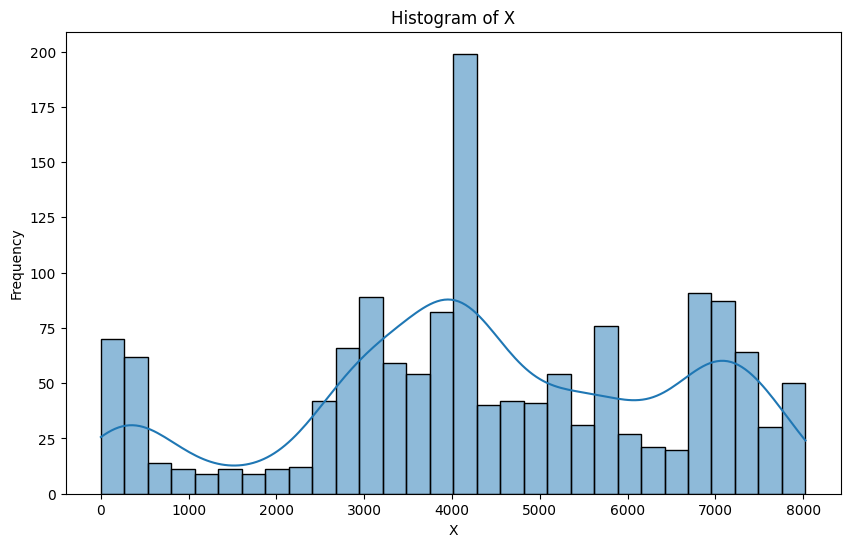

In [10]:
ph_df.plot_hist(column='X', save=False)

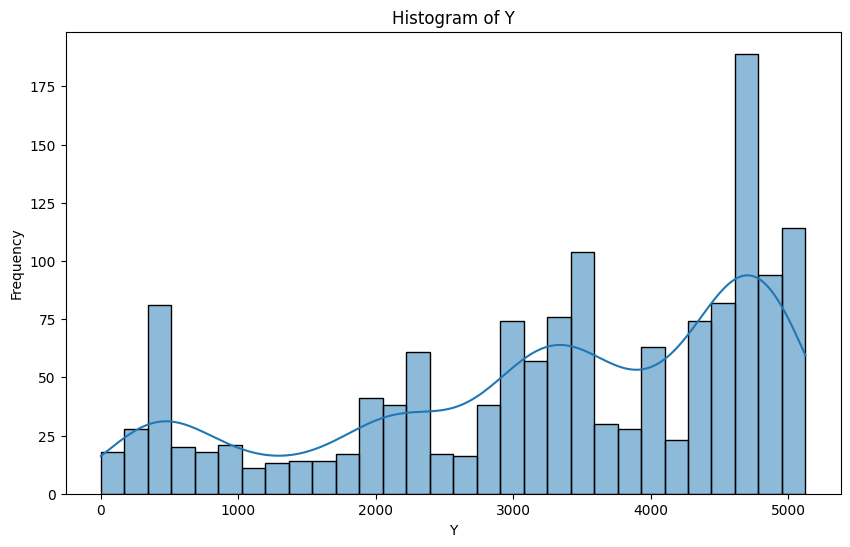

In [11]:
ph_df.plot_hist(column='Y', save=False)

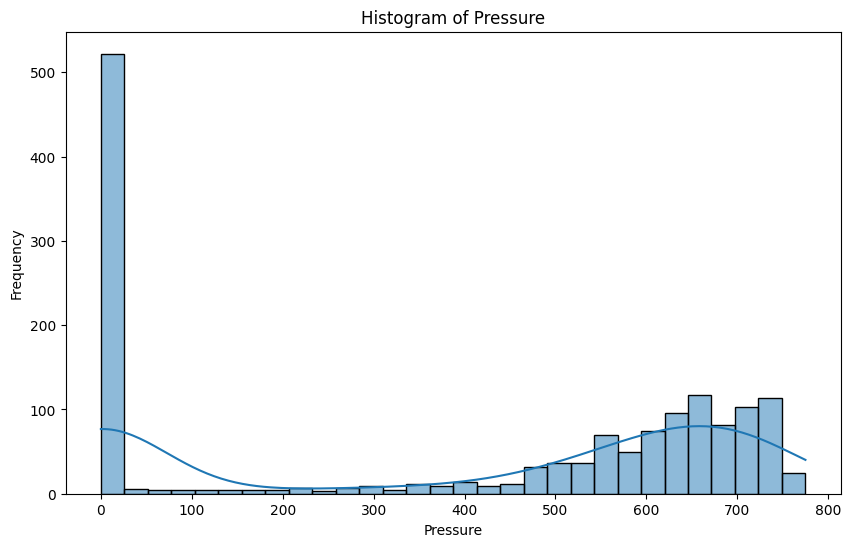

In [12]:
ph_df.plot_hist(column='Pressure', save=False)

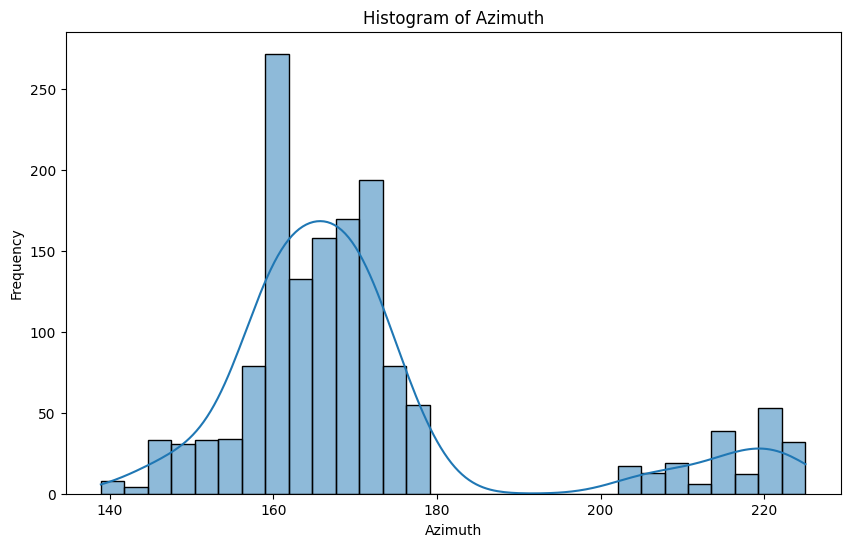

In [13]:
ph_df.plot_hist(column='Azimuth', save=False)

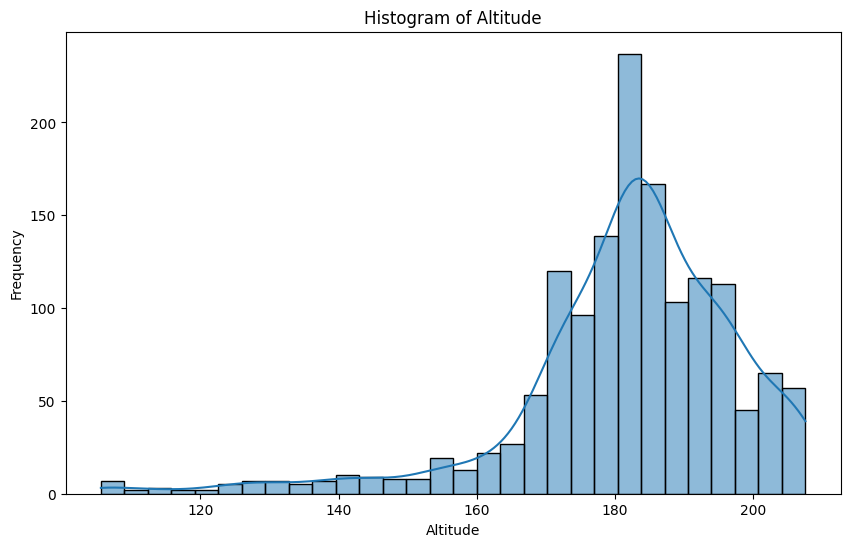

In [14]:
ph_df.plot_hist(column='Altitude', save=False)

In [15]:
# Imprimir la distribucion de clases para el usuario 1-7 
# 'tn_data' is a list of DataFrames inside the 'data_dict'
for task_key in data_dict.keys():
    if 't' in task_key:  # This checks if the key is of the form 't1_data', 't2_data', etc.
        for index, df in enumerate(data_dict[task_key]):
            print(f"--- Analyzing Task {task_key} - User {index + 1} ---")
            analyzer = DataFrameAnalyzer(df)
            analyzer.print_info()  # Print general info about the DataFrame


--- Analyzing Task t1_data - User 1 ---
DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Y         1474 non-null   float64
 1   X         1474 non-null   float64
 2   Azimuth   1474 non-null   float64
 3   Altitude  1474 non-null   float64
 4   Pressure  1474 non-null   float64
dtypes: float64(5)
memory usage: 57.7 KB
--- Analyzing Task t1_data - User 2 ---
DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085 entries, 0 to 2084
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Y         2085 non-null   float64
 1   X         2085 non-null   float64
 2   Azimuth   2085 non-null   float64
 3   Altitude  2085 non-null   float64
 4   Pressure  2085 non-null   float64
dtypes: float64(5)
memory usage: 81.6 KB
--- Analyzing Task t1_data - User 

In [16]:
for task_key in data_dict.keys():
    if 't' in task_key:  # This checks if the key is of the form 't1_data', 't2_data', etc.
        for index, df in enumerate(data_dict[task_key]):
            print(f"--- Analyzing Task {task_key} - User {index + 1} ---")
            statistics = DataStatistics(df)
            statistics.print_summary_statistics()


--- Analyzing Task t1_data - User 1 ---

Summary statistics:
                 Y            X      Azimuth     Altitude     Pressure
count  1474.000000  1474.000000  1474.000000  1474.000000  1474.000000
mean   3319.070556  4390.103799   171.206704   182.060107   386.453867
std    1469.287910  2124.282037    18.865782    16.693964   308.143528
min       0.000000     0.000000   138.901099   105.571848     0.000000
25%    2305.000000  3134.000000   160.879121   175.953079     0.000000
50%    3504.500000  4178.000000   167.032967   182.991202   539.500000
75%    4668.750000  6062.750000   172.307692   193.548387   657.750000
max    5126.000000  8026.000000   225.054945   207.624633   775.000000
--- Analyzing Task t1_data - User 2 ---

Summary statistics:
                 Y            X      Azimuth     Altitude     Pressure
count  2085.000000  2085.000000  2085.000000  2085.000000  2085.000000
mean   3326.531415  3948.294484   171.220281   193.916327   363.649880
std    1859.775217  2261.1

In [17]:
for task_key in data_dict.keys():
    if 't' in task_key:  # This checks if the key is of the form 't1_data', 't2_data', etc.
        for index, df in enumerate(data_dict[task_key]):
            print(f"--- Analyzing Task {task_key} - User {index + 1} ---")
            analyzer = MissingValueAnalyzer(df)
            analyzer.display_missing_columns()

--- Analyzing Task t1_data - User 1 ---
No hay columnas con valores faltantes.
--- Analyzing Task t1_data - User 2 ---
No hay columnas con valores faltantes.
--- Analyzing Task t1_data - User 3 ---
No hay columnas con valores faltantes.
--- Analyzing Task t1_data - User 4 ---
No hay columnas con valores faltantes.
--- Analyzing Task t1_data - User 5 ---
No hay columnas con valores faltantes.
--- Analyzing Task t1_data - User 6 ---
No hay columnas con valores faltantes.
--- Analyzing Task t1_data - User 7 ---
No hay columnas con valores faltantes.
--- Analyzing Task t1_data - User 8 ---
No hay columnas con valores faltantes.
--- Analyzing Task t1_data - User 9 ---
No hay columnas con valores faltantes.
--- Analyzing Task t1_data - User 10 ---
No hay columnas con valores faltantes.
--- Analyzing Task t1_data - User 11 ---
No hay columnas con valores faltantes.
--- Analyzing Task t1_data - User 12 ---
No hay columnas con valores faltantes.
--- Analyzing Task t1_data - User 13 ---
No hay c